In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data/all_africa_southsudan.csv")
df_articles = pd.read_csv("data/articles_summary_cleaned.csv")
# Convert the 'date' column to datetime format for easier plotting
df['date'] = pd.to_datetime(df['date'])

df=pd.DataFrame(df)
df

,title,date,paragraphs,publisher
0,South Sudan: A Former Child Soldier Fights to ...,2021-02-12,"Sara, who was abducted at age 12, spent two ye...",Thomson Reuters Foundation (London)
1,South Sudan: #budget2019 - Will It Lead to Mor...,2019-02-21,Legal claims against the department now amount...,Bhekisisa (Johannesburg)
2,South Sudan: Retired NBA Star Elected Basketba...,2019-11-25,Former NBA star Luol Ajou Deng has been electe...,The East African (Nairobi)
3,"South Sudan - Political Violence On the Rise, ...",2022-02-11,UN human rights experts have warned of increas...,UN News Service
4,South Sudan: S. Sudan Receives First Astrazene...,2021-03-25,"Juba — South Sudan on Thursday received 132,00...",The East African (Nairobi)
...,...,...,...,...
18221,South Sudan: A Fantasy of Finality - the UN Im...,2020-09-23,Debating Ideas is a new section that aims to r...,African Arguments
18222,South Sudan: Reporter Kidnapped and Tortured T...,2016-03-08,Reporters Without Borders (RSF) condemns the a...,Reporters sans Frontières (Paris)
18223,South Sudan: Lakes - Five People Shot in Rumbe...,2013-07-16,Rumbek — Members of South Sudan's police and a...,Sudan Tribune
18224,Uganda: Education Still Eludes Refugees in Uganda,2014-04-24,"Rhino Camp — Emmanuel Peter Gai, a secondary s...",Sudan Tribune


In [50]:
df_articles=pd.DataFrame(df_articles)
df_articles

,summary,date,location_article,lat,lng
0,The article discusses the passing of the new C...,2011-07-07,Juba,4.859363,31.571250
1,The article discusses the military actions tak...,2011-07-03,Abyei,9.838551,28.486396
2,The article discusses the signing of a Framewo...,2011-06-30,Southern Kordofan,11.036544,30.895824
3,The article discusses the upcoming independenc...,2011-07-04,South Sudan,6.876992,31.306979
4,The article discusses the need for South Sudan...,2011-07-02,Juba,4.859363,31.571250
...,...,...,...,...,...
18515,The article discusses the successful delivery ...,2023-04-26,Maiwut Primary Health Care Centre,8.606200,33.924100
18516,The article discusses the bombing and forced e...,2023-04-26,Khartoum,15.500654,32.559899
18517,The article discusses how Prime Minister Abiy ...,2023-04-23,Addis Ababa,8.980603,38.757761
18518,The article discusses the collapse of a commer...,2023-04-17,Kampala International University,0.294360,32.603970


# Useful Functions

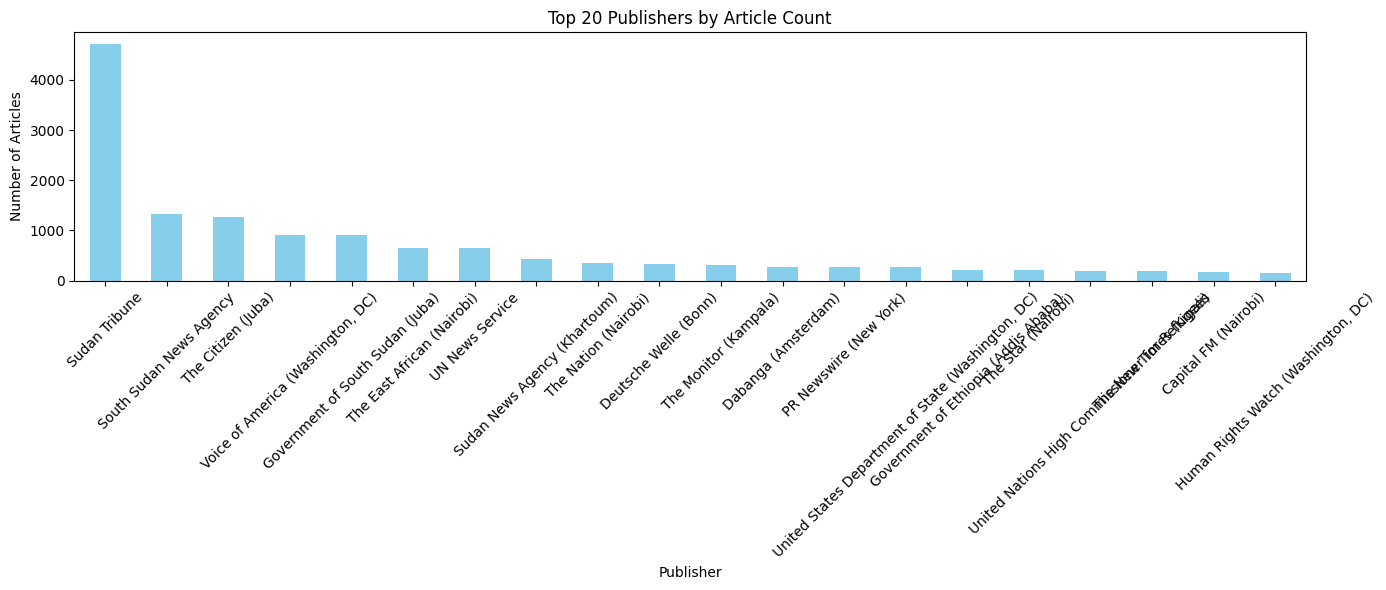

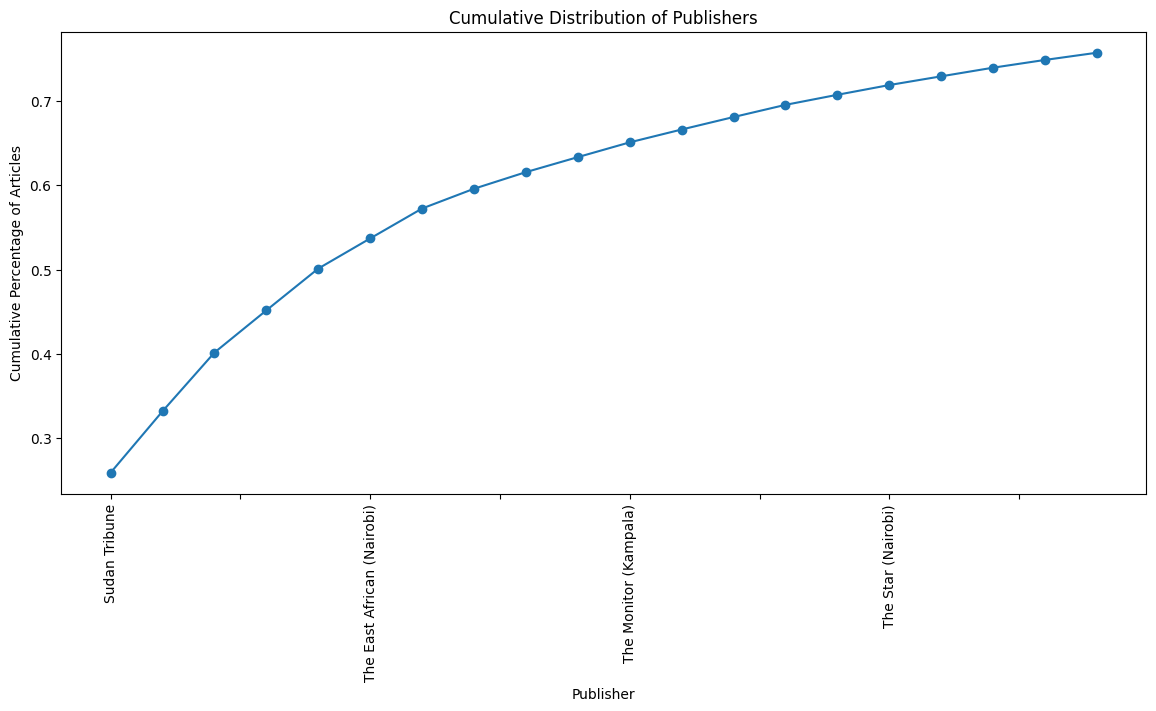

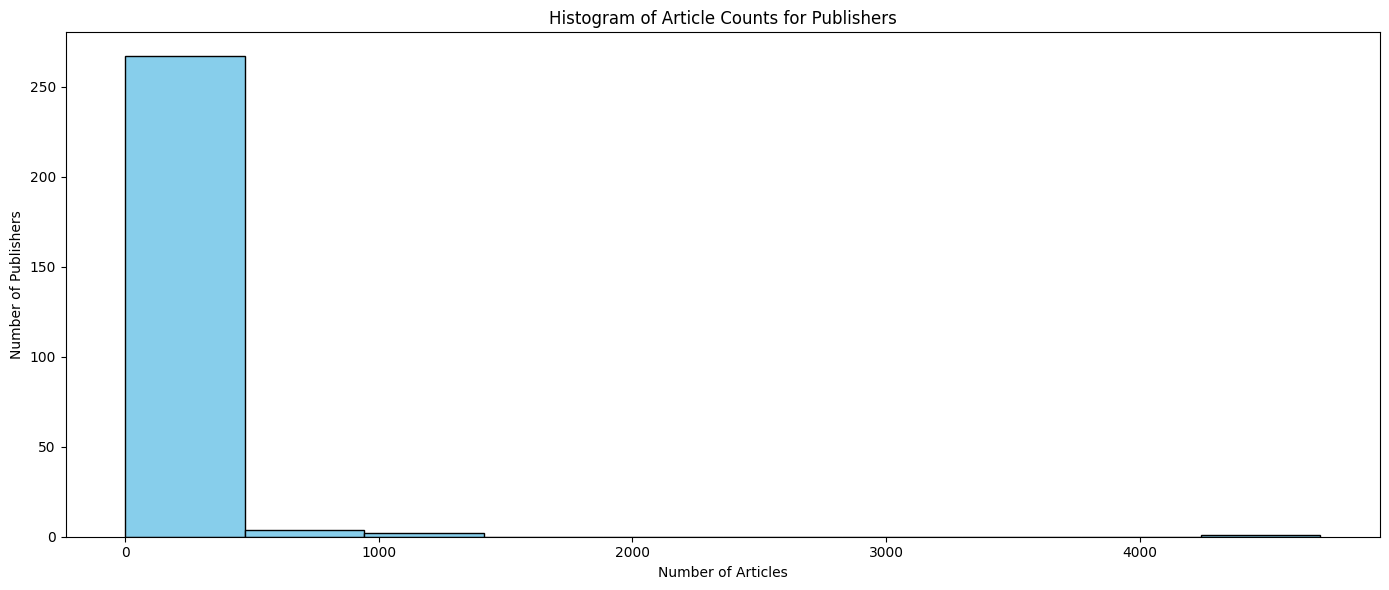

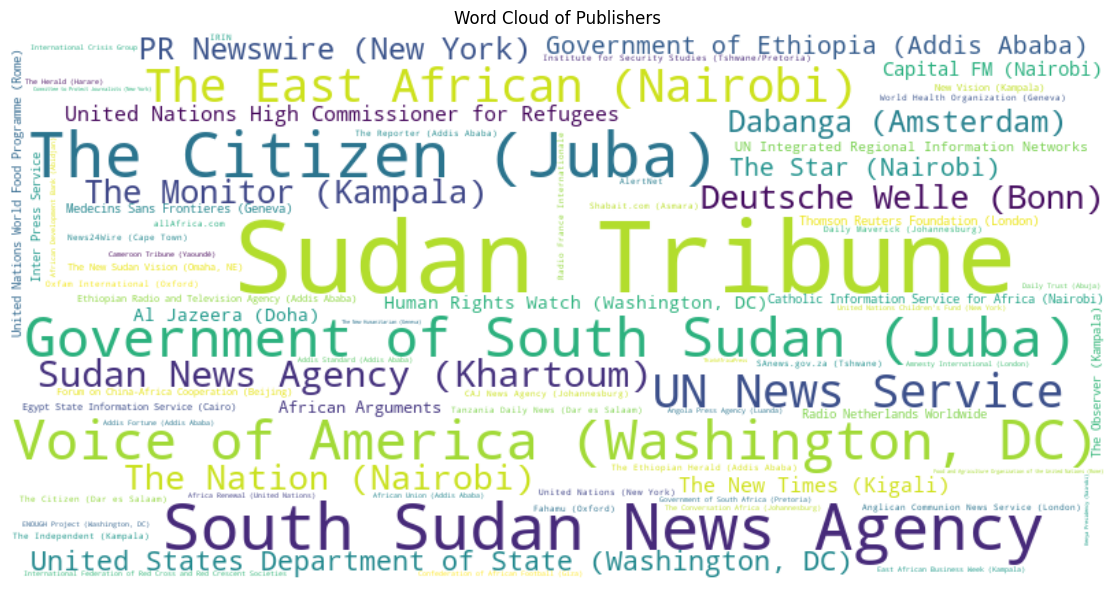

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def visualize_publishers(data, top_n=20):
    """
    Visualizes a dataset of articles and publishers.

    :param data: DataFrame with at least 'publisher' column.
    :param top_n: Number of top publishers to display in the bar chart.
    """

    # Bar Chart of Top N Publishers
    top_publishers = data['publisher'].value_counts().head(top_n)
    top_publishers.plot(kind='bar', figsize=(14, 6), color='skyblue')
    plt.title(f'Top {top_n} Publishers by Article Count')
    plt.xlabel('Publisher')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Cumulative Distribution of Publishers
    cumulative_dist = data['publisher'].value_counts(normalize=True).cumsum()
    cumulative_dist.head(top_n).plot(kind='line', marker='o', figsize=(14, 6))
    plt.title('Cumulative Distribution of Publishers')
    plt.xlabel('Publisher')
    plt.ylabel('Cumulative Percentage of Articles')
    plt.xticks(rotation=90)
    #plt.tight_layout()
    plt.show()

    # Histogram of Article Counts for Publishers
    publisher_counts = data['publisher'].value_counts()
    plt.figure(figsize=(14, 6))
    plt.hist(publisher_counts, bins=10, color='skyblue', edgecolor='black')
    plt.title('Histogram of Article Counts for Publishers')
    plt.xlabel('Number of Articles')
    plt.ylabel('Number of Publishers')
    plt.tight_layout()
    plt.show()

 
    # Word Cloud for Publishers
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(publisher_counts)
    plt.figure(figsize=(14, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Publishers')
    plt.tight_layout()
    plt.show()



visualize_publishers(df)


# Data Sources
All our articles come from a website called allAfrica. \
Bias of allAfrica -- https://mediabiasfactcheck.com/allafrica/ \
AllAfrica aggregates news from newspapers, news agencies, and publications from the African continent. \
"They include government and opposition-controlled papers, as well as the growing number of independent, professional news publications across the continent. In this way, we provide access to a full range of what Africans themselves are saying, thinking and publishing -- a unique compilation of information that is valuable to policy makers, businesses, non-governmental organizations, scholars and journalists, as well as to the general public." --- https://allafrica.com/list/publisher/editorial/editorial/type/pub.html

In [99]:
df_source = df[['publisher','title']]
df_source=df_source.groupby(['publisher']).count()
df_source.sort_values(by=['title'], inplace=True, ascending=False)


df_source.head(20)

,title
publisher,
Sudan Tribune,4712
South Sudan News Agency,1331
The Citizen (Juba),1271
"Voice of America (Washington, DC)",914
Government of South Sudan (Juba),905
The East African (Nairobi),653
UN News Service,648
Sudan News Agency (Khartoum),428
The Nation (Nairobi),360


# South Sudan Situation
There is definetely a lot of tension between the South Sudan government and many international news sources. https://www.theeastafrican.co.ke/tea/news/east-africa/south-sudanese-regulator-accuses-media-of-bias-1382100
\
No press freedom https://www.theguardian.com/world/2016/jul/07/south-sudan-is-wiping-out-its-free-press-one-journalist-at-a-time 

# Distribution of News Articles
### Sudan Tribune - 4712 = 26% of articles. 
For a long time has been one of the major news sources in South Sudan. Reliable\
The Sudan Tribune is a Paris-based news site. There has been multiple ocasions where the Sudanese government restriced access to multiple data sources (one of them being Sudan Tribune).\
 Example-July 2017 The government said was a “hostile” reporting against the government of President Salva Kiir Mayardiit - https://radiotamazuj.org/en/news/article/opinion-south-sudan-government-should-lift-ban-on-blocked-news-websites



In [61]:
df_tribune = df[df['publisher']=='Sudan Tribune']
df_tribune

,title,date,paragraphs,publisher
3268,South Sudan: S. Sudan President Calls for Inte...,2014-09-03,Juba — South Sudanese president Salva Kiir has...,Sudan Tribune
3269,South Sudan: Citizens React to Adjournment of ...,2014-10-05,Juba — The postponement of South Sudan peace t...,Sudan Tribune
3276,South Sudan: Three Dead in Western Equatoria S...,2014-12-27,Juba — Three people were killed when herders f...,Sudan Tribune
3279,South Sudan: UNHCR and S. Sudanese Authorites ...,2014-09-20,Nimule — The United Nations Refugee Agency (UN...,Sudan Tribune
3281,South Sudan: IGAD Condemns Renewed Violence,2015-01-01,Addis Ababa — Mediators of the East Africa's b...,Sudan Tribune
...,...,...,...,...
18214,South Sudan: W. Bahr El Ghazal Police Security...,2015-01-07,Wau — The police force in South Sudan's Wester...,Sudan Tribune
18216,South Sudan: Jonglei - UN Official Pledges Sup...,2012-12-17,"Bor — Judy Cheng, the United Nations Assistant...",Sudan Tribune
18219,South Sudan: Lack of Legal Representation Jeop...,2012-09-27,The Republic of South Sudan is a country among...,Sudan Tribune
18223,South Sudan: Lakes - Five People Shot in Rumbe...,2013-07-16,Rumbek — Members of South Sudan's police and a...,Sudan Tribune


### South Sudan News Agency - 1331 -- 7%
South Sudan News Agency is a US based news site. "The South Sudan News Agency, founded in 2008 and launched in 2010, features the best authors and scholars from the South Sudan and other regions around the world, writing about topics of interest to The South Sudan people and other interested parties."\
It is extremely difficult to find any information regarding potential bias, but it is fair to assume that they are anti-government

In [63]:

df_ss = df[df['publisher']=='South Sudan News Agency']
df_ss

,title,date,paragraphs,publisher
44,South Sudan: World Bank Approves U.S.$100 Mill...,2022-01-27,Juba — The World Bank has approved a $100 mill...,South Sudan News Agency
427,South Sudan: National Security Arrests Journal...,2023-01-08,"Nairobi, — South Sudan's National Security has...",South Sudan News Agency
1468,South Sudan: Born in the Unlucky Generations o...,2023-03-26,There have been six generations of South Sudan...,South Sudan News Agency
1576,South Sudan Lobbies Russia to Lift Arms Embargo,2022-12-25,"Washington, DC/Juba — The government of South ...",South Sudan News Agency
3654,South Sudan: SPLM-USA National Secretariat Con...,2014-08-15,The office of the SPLM-USA National Secretaria...,South Sudan News Agency
...,...,...,...,...
18109,"Sudan: Pray for Jonglei, South Sudan and Civility",2012-03-20,"New York, USA — War must not be undertaken unl...",South Sudan News Agency
18125,Sudan: Why the UNSC Seems Far Away From the 'N...,2012-07-29,Undoubtedly there is much to learn when it com...,South Sudan News Agency
18128,Sudan: Leader of Minority in Upper Nile State ...,2012-08-22,Press Statement by the Leader of Minority in U...,South Sudan News Agency
18173,Sudanese Refugees Face Rising Challenges As Ou...,2012-05-11,Thousands of people have fled Sudans South Kor...,South Sudan News Agency


### The Citizen (Juba) - 1271 -- 7%
The Citizen was an English-language newspaper based in Juba, the national capital of South Sudan and the state capital of Central Equatoria. 

2012 https://ethicaljournalismnetwork.org/south-sudan I The Citizen and Al Masir, faced a costly court case after Pagan Amum, who was then Secretary-General of the ruling party, was named in a corruption scandal. Each newspaper was ordered to up to pay damages of $37,000.

https://sudantribune.com/article37708/ Offices raided


In September 2015 the Editor-in-Chief of The Citizen Nhial Bol announced he was resigning and shutting down the newspaper and TV station after government security agents shut down his newspaper's premises, while receiving death threats. https://en.wikipedia.org/wiki/The_Citizen_(South_Sudan)

https://www.voaafrica.com/a/south-sudan-media-rights-censorship/2901047.html ORDERS CLOSING

In [65]:
df_thecitizen = df[df['publisher']=='The Citizen (Juba)']
df_thecitizen

,title,date,paragraphs,publisher
9812,South Sudan: SSDM Chairman Condemns Violence b...,2012-09-01,Juba — The Chairman of South Sudan Democratic ...,The Citizen (Juba)
9819,South Sudan: Jusu Threatens to Sue University ...,2012-06-22,Juba — Juba University Students' Union threate...,The Citizen (Juba)
9820,Sudan: SPLM SG Accuses Country of Wanting War ...,2012-04-19,A prominent Politician in the Sudan People's L...,The Citizen (Juba)
9827,"South Sudan: Ethiopia, Djibouti Delegations in...",2012-05-04,Juba — A high level delegation from both the n...,The Citizen (Juba)
9830,South Sudan Militia General Defects to Governm...,2012-06-21,According to militia website reports circulate...,The Citizen (Juba)
...,...,...,...,...
18144,South Sudan: UNDP Donates Nine Vehicles to Uni...,2012-08-03,The United Nations Development Program (UNDP) ...,The Citizen (Juba)
18145,South Sudan: Western Equatoria State Welcomes ...,2012-05-15,Wau — The Governor of Western Equatoria state ...,The Citizen (Juba)
18148,South Sudan: Will Injustice and Inequality Mak...,2011-12-13,The South Sudan had separated from the Sudan a...,The Citizen (Juba)
18160,South Sudan: Coat of Arms Designers Threaten t...,2012-05-08,The Coat of Arm designers have threatened to g...,The Citizen (Juba)


### Voice of America (Washington, DC) 5%
State-owned news network and international radio broadcaster of the United States of America. It is the largest and oldest of the U.S.-funded international broadcasters.

Has the most recent data

In [84]:
df_voa = df[df['publisher'].str.contains('Voice of America', case=False, na=False)]
df_voa



,title,date,paragraphs,publisher
8,Africa: Pope Francis Prepares for Long-Awaited...,2023-01-18,Rome — Pope Francis is set travel to the Democ...,"Voice of America (Washington, DC)"
9,South Sudan: Raila Odinga Offers to Be Mediator,2018-06-06,Former Kenyan Prime Minister Raila Odinga said...,"Voice of America (Washington, DC)"
27,South Sudan: Amnesty Urges Moratorium on Execu...,2019-03-02,Amnesty International said Friday that it was ...,"Voice of America (Washington, DC)"
45,"South Sudan: Security Improves, Fishing Resume...",2020-01-31,Authorities and residents in South Sudan's Eas...,"Voice of America (Washington, DC)"
50,South Sudan: Delegates Mull Over IGAD Proposal,2018-05-23,South Sudan's warring parties are expected to ...,"Voice of America (Washington, DC)"
...,...,...,...,...
18172,South Sudan: UN Chief Urges South Sudan to End...,2014-09-25,United Nations — U.N. Secretary-General Ban Ki...,"Voice of America (Washington, DC)"
18177,South Sudan: Police Detain Suspects in Bishop-...,2021-04-27,Rumbek — Authorities in the capital of South S...,"Voice of America (Washington, DC)"
18192,South Sudan: New Bridge Slashes Travel Times i...,2019-06-08,Residents and officials in northwest South Sud...,"Voice of America (Washington, DC)"
18198,South Sudan: Kiir Urges Youth to 'Reject Reven...,2014-02-17,Juba — South Sudanese President Salva Kiir evo...,"Voice of America (Washington, DC)"


### Government of South Sudan (Juba) 5%
Might be stated owned. Considering the status of free media in south sudan , this might be heavily biased
Press release https://allafrica.com/stories/201511162878.html

Max 2016


In [93]:
df_gov = df[df['publisher']=='Government of South Sudan (Juba)']
df_gov

,title,date,paragraphs,publisher
2493,South Sudan: President Salva Kiir Mayardit Wel...,2015-11-11,President Salva Kiir Mayardit of the Republic ...,Government of South Sudan (Juba)
3037,South Sudan: Juba and Khartoum Sign Border Dem...,2016-09-30,Addis Ababa — The six review meetings of the S...,Government of South Sudan (Juba)
3313,South Sudan: Heavy Rains May Cause Food Shortages,2014-07-19,Juba — The Commissioner of Terekeka County Jac...,Government of South Sudan (Juba)
3321,South Sudan: Border Issues With Uganda Be Left...,2015-08-19,Juba — The minister of foreign affairs ad inte...,Government of South Sudan (Juba)
3335,South Sudan Questions Why U.S. Citizens Are Pa...,2015-05-05,Juba — A US citizen of south Sudan origin was ...,Government of South Sudan (Juba)
...,...,...,...,...
18138,South Sudan: Salary Payment Procedures for Civ...,2011-11-15,Juba — Following recent concerns over the dela...,Government of South Sudan (Juba)
18147,South Sudan: Ministry of Information and UNICE...,2011-12-03,Juba — A two days joint training workshop orga...,Government of South Sudan (Juba)
18194,South Sudan: Country Is UNESCO's 194th Member,2011-11-03,Juba — The nearly four month old Republic of S...,Government of South Sudan (Juba)
18196,South Sudan: 'Abyei Referendum Must Be Conduct...,2013-09-21,Juba — The US government is calling on the int...,Government of South Sudan (Juba)


### The East African (Nairobi) 3.7%

The EastAfrican is a weekly newspaper published in Kenya by the Nation Media Group, which also publishes Kenya's national Daily Nation. The EastAfrican is circulated in Kenya and the other countries of the African Great Lakes region, including Tanzania, Uganda and Rwanda.

Editorially, Daily Nation favored the left in the past with support for the opposition with stories such as this “US media firm targeted Raila Odinga with attack ads, report says” (2017). However, over time they have limited criticism of the government and began praising the current right-leaning government, such as this “Good news for farmers” (2020). Further, the owner of Nation Media Group, businessman/philanthropist religious leader Aga Khan has close ties with the right-leaning government of Kenya as he visits and discusses his investments. Although there is a lack of criticism of the Right-leaning government, they often advocate for more liberal causes such as Gender Activism and Climate Change. Therefore, we rate them left-center when it comes to editorial bias.

https://mediabiasfactcheck.com/the-daily-nation/


Max 2021

In [96]:
df_east_african = df[df['publisher']=='The East African (Nairobi)']
df_east_african


,title,date,paragraphs,publisher
2,South Sudan: Retired NBA Star Elected Basketba...,2019-11-25,Former NBA star Luol Ajou Deng has been electe...,The East African (Nairobi)
4,South Sudan: S. Sudan Receives First Astrazene...,2021-03-25,"Juba — South Sudan on Thursday received 132,00...",The East African (Nairobi)
19,South Sudan: Lack of Power Lines Hurts South S...,2019-08-31,South Sudan's chance to be the first major con...,The East African (Nairobi)
21,South Sudan: Signs of Progress in Peace Talks,2018-02-15,South Sudan peace talks in the Ethiopian capit...,The East African (Nairobi)
22,South Sudan to Upgrade Aviation Infrastructure,2021-04-09,South Sudan is revamping its aviation infrastr...,The East African (Nairobi)
...,...,...,...,...
18163,South Sudan: AU Blames Juba Over Killing of Si...,2017-03-27,utThe African Union has faulted South Sudan ov...,The East African (Nairobi)
18181,East Africa Attracts U.S.$3.4 Billion in Proje...,2017-05-23,"The discovery of oil, gas and mineral deposits...",The East African (Nairobi)
18193,South Sudan: AU Urged to Speed Up Establishmen...,2020-11-25,Juba — The Human Rights Watch has urged the Af...,The East African (Nairobi)
18205,East Africa: Pastoralists Move to North Uganda...,2017-02-20,"As Uganda grapples with food insecurity, which...",The East African (Nairobi)


### Sudan News Agency (Khartoum) 2% Clear Bias
https://www.cigionline.org/articles/manufacturing-a-veneer-of-legitimacy-warlords-drag-sudan-into-the-abyss/

Although privately owned, the Sudan News Agency (SUNA) has likewise exhibited a clear bias toward SAF, its coverage generally limited to congratulatory remarks and statements from the armed forces. For example, a May 9 statement from a SAF spokesperson published on the SUNA website called on the RSF “to stop persisting in the failed rebellion plot,” and minimizes the extent of the chaos: “The operational situation is stable in all states of the country, except for some clashes with rebel militia groups in some parts of the capital.”


The official Sudan News Agency (SUNA) distributes news in Arabic, English and
French and is considered to be tightly controlled by the government through
the Ministry of Information. The board consists of seven members who are
all appointed by the Minister of Information and the Minister of Finance.
Presently, SUNA has no presence in Southern Sudan. However, according
to an agreement in the Joint Technical Committee on the Information
Sector, signed by the two ministers of information in May 2007, an office
is in the process of being established in Southern Sudan

https://www.mediasupport.org/wp-content/uploads/2012/11/ims-media-in-sudan-crossroads-2007.pdf 

In [98]:

df_suna= df[df['publisher']=='Sudan News Agency (Khartoum)']
df_suna

,title,date,paragraphs,publisher
15,South Sudan: Al-Burhan Concludes Visit to Repu...,2023-01-12,Khartoum — The President of the Transitional S...,Sudan News Agency (Khartoum)
31,Sudan: Menawi Arrives in Juba,2020-08-09,Khartoum — The Leader of the Sudan Liberation ...,Sudan News Agency (Khartoum)
49,Sudan: TSC Members Back Home From Juba,2020-11-02,Khartoum — Members of the Transitional Soverei...,Sudan News Agency (Khartoum)
67,South Sudan: Government and Woman Delegations ...,2020-09-04,Juba — The Government delegation led by the Me...,Sudan News Agency (Khartoum)
71,Sudan: FM Undersecretary Meets Deputy Director...,2018-05-10,Khartoum — The Foreign Ministry Undersecretary...,Sudan News Agency (Khartoum)
...,...,...,...,...
18021,South Sudan: Salva Kiir Affirms Solidarity of ...,2020-09-09,Khartoum — The Chairman of the Transitional So...,Sudan News Agency (Khartoum)
18090,Sudan: Undersecretary of Foreign Ministry and ...,2013-10-09,Khartoum — The Undersecretary of the Ministry ...,Sudan News Agency (Khartoum)
18139,Sudan: FM Undersecretary Receives South Sudan ...,2017-08-21,Khartoum — The Undersecretary at the Ministry ...,Sudan News Agency (Khartoum)
18170,Sudan: Juba Peace Agreement On Two Areas Track...,2020-08-31,Juba — The Sudanese Government and the Sudan P...,Sudan News Agency (Khartoum)


### Daily Nation 2%

Overall, we rate Daily Nation Left-Center Biased based on editorial positions that favor a liberal perspective. We also rate them Mixed for factual reporting due to poor sourcing techniques and a lack of reporting on the opposition to the right-leaning government.
https://mediabiasfactcheck.com/the-daily-nation/

Established in 1960 as Taifa, The Daily Nation or Nation is a Kenyan newspaper headquartered in Nairobi, Kenya, published by Nation Media Group. The Daily Nation covers current affairs, politics, lifestyle, entertainment, and sports. It was founded by British Colonial government officer Charles Hayes and later bought by Aga Khan, the founder of Nation Media Group.   

In [100]:
df_daily_nation= df[df['publisher']=='The Nation (Nairobi)']
df_daily_nation

,title,date,paragraphs,publisher
6,South Sudan: President Salva Kiir Sacks Army C...,2021-04-10,South Sudan President Salva Kiir has appointed...,The Nation (Nairobi)
14,South Sudan: The 'Executioner' Who Would Kill ...,2019-05-05,Reports of torture and killings by South Sudan...,The Nation (Nairobi)
18,South Sudan: Rebels to Release Detained Kenyan...,2018-02-18,"After more than a month in captivity, two Keny...",The Nation (Nairobi)
26,East Africa: Let Egypt Be Fair Over Nile,2019-10-22,The importance of the River Nile to Egypt's su...,The Nation (Nairobi)
48,South Sudan: Widening Kiir-Machar Fault Lines ...,2019-11-03,South Sudanese protagonists have drifted apart...,The Nation (Nairobi)
...,...,...,...,...
17925,Kenya Rejects Dismissal of UN Peace Keeping Fo...,2016-11-02,Kenya has rejected the dismissal of Lt-Gen Joh...,The Nation (Nairobi)
18079,South Sudan: Juba Shuts Down Oil Pipeline to N...,2012-01-20,South Sudan on Friday shut down its oil pipeli...,The Nation (Nairobi)
18095,South Sudan: A Reality Check for People of Sou...,2011-07-09,As congratulations pour in for the world's you...,The Nation (Nairobi)
18118,South Sudan: IGAD Foreign Ministers in Juba on...,2018-04-29,The Inter-Governmental Authority on Developmen...,The Nation (Nairobi)
